# 1. Анализ данных в Python (pandas и numpy)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('google_books_dataset.csv')

print(df.head())
print(df.tail())



        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers                  Macmil

In [ ]:
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')
print('Имена столбцов:')
for i, col in enumerate(df.columns, 1):
    print(f'{i:2}. {col}')

Количество строк: 15147
Количество столбцов: 21
Имена столбцов:
 1. book_id
 2. title
 3. subtitle
 4. authors
 5. publisher
 6. published_date
 7. description
 8. page_count
 9. categories
10. average_rating
11. ratings_count
12. language
13. preview_link
14. info_link
15. isbn_13
16. isbn_10
17. list_price
18. currency
19. buyable
20. search_category
21. thumbnail


In [ ]:
print(df.dtypes)
print(df.isnull().sum())
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
if 'buyable' in df.columns:
    df['buyable'] = df['buyable'].astype(str).str.lower().map({'true': True, 'false': False})

book_id             object
title               object
subtitle            object
authors             object
publisher           object
published_date      object
description         object
page_count         float64
categories          object
average_rating     float64
ratings_count        int64
language            object
preview_link        object
info_link           object
isbn_13            float64
isbn_10             object
list_price         float64
currency            object
buyable               bool
search_category     object
thumbnail           object
dtype: object
book_id                0
title                  8
subtitle            9164
authors             3525
publisher           8057
published_date       214
description         6796
page_count           214
categories          2452
average_rating     14290
ratings_count          0
language               0
preview_link           0
info_link              0
isbn_13             7764
isbn_10             8026
list_price         

In [ ]:
numeric_columns = ['page_count', 'average_rating', 'ratings_count', 'list_price']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
categorical_cols = ['language', 'categories', 'search_category', 'currency']
for col in categorical_cols:
    if col in df.columns:
        print(df[col].value_counts().head(5))

language
en       14821
es          69
de          42
fr          35
pt-BR       34
Name: count, dtype: int64
categories
Fiction                 994
Computers               737
Business & Economics    563
Education               371
History                 365
Name: count, dtype: int64
search_category
bestsellers 2024    156
romance             155
italian cooking     155
bestsellers 2022    154
c++ programming     154
Name: count, dtype: int64
currency
USD    2943
Name: count, dtype: int64


In [ ]:
if 'published_date' in df.columns and df['published_date'].notna().any():
    print('Количество книг по годам:')
    year_counts = df['published_date'].dt.year.value_counts().sort_index()
    print(year_counts.head(10))

Количество книг по годам:
published_date
1928.0    1
1963.0    1
1966.0    1
1967.0    1
1968.0    1
1970.0    1
1971.0    2
1972.0    1
1974.0    4
1975.0    1
Name: count, dtype: int64


In [ ]:
if 'authors' in df.columns:
    # Разделим авторов, так как в некоторых строках их несколько
    all_authors = df['authors'].dropna().str.split(', ').explode()
    print(f'Общее количество уникальных авторов: {all_authors.nunique()}')

Общее количество уникальных авторов: 12412


In [ ]:
if 'list_price' in df.columns and df['list_price'].notna().any():
    price_stats = df['list_price'].dropna()
    print(f"Средняя цена: ${price_stats.mean():.2f}")
    print(f"Минимальная цена: ${price_stats.min():.2f}")
    print(f"Максимальная цена: ${price_stats.max():.2f}")
    print(f"Медианная цена: ${price_stats.median():.2f}")

Средняя цена: $48.17
Минимальная цена: $0.00
Максимальная цена: $1755.00
Медианная цена: $19.00


In [ ]:
df = df.drop_duplicates(subset=['book_id'])

In [ ]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent.round(2)
})
print(missing_info[missing_info['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False))

                Количество пропусков  Процент пропусков
average_rating                 14290              94.34
list_price                     12204              80.57
currency                       12204              80.57
subtitle                        9164              60.50
published_date                  9093              60.03
publisher                       8057              53.19
isbn_10                         8026              52.99
isbn_13                         7764              51.26
description                     6796              44.87
authors                         3525              23.27
categories                      2452              16.19
thumbnail                        669               4.42
page_count                       214               1.41
title                              8               0.05


In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['page_count'] = pd.to_numeric(df['page_count'], errors='coerce')
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['list_price'] = pd.to_numeric(df['list_price'], errors='coerce')

# Гистограмма

/tmp/ipython-input-401009381.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


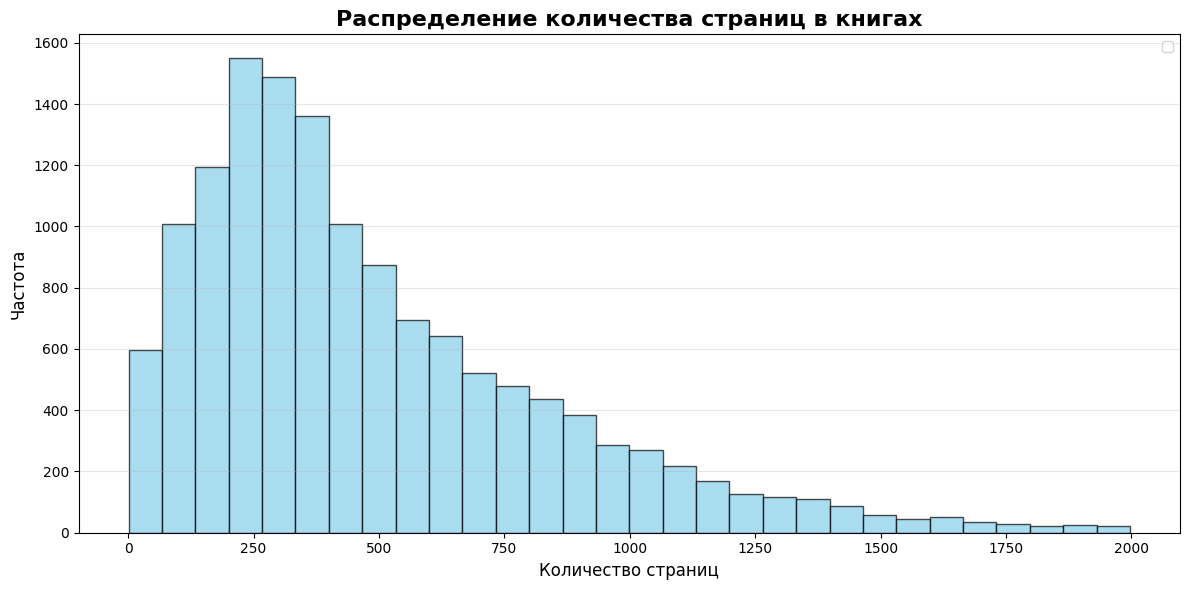

In [ ]:
plt.figure(figsize=(12, 6))
page_data = df['page_count'].dropna()
page_data = page_data[(page_data > 0) & (page_data < 2000)]

plt.hist(page_data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение количества страниц в книгах', fontsize=16, fontweight='bold')
plt.xlabel('Количество страниц', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Линейный график

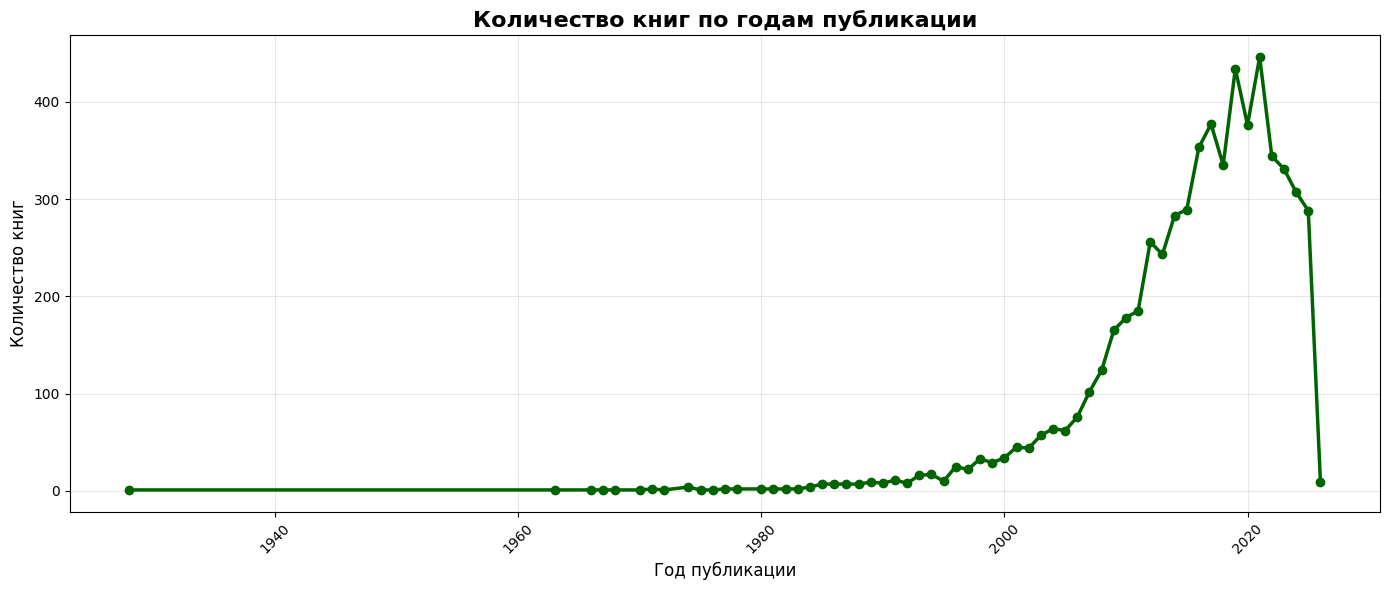

In [ ]:
df['year'] = df['published_date'].dt.year

# Группируем по годам
yearly_counts = df['year'].value_counts().sort_index()
# Удаляем NaN
yearly_counts = yearly_counts.dropna()

plt.figure(figsize=(14, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o',
         linewidth=2.5, markersize=6, color='darkgreen')

plt.title('Количество книг по годам публикации', fontsize=16, fontweight='bold')
plt.xlabel('Год публикации', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Столбчатая диаграмма

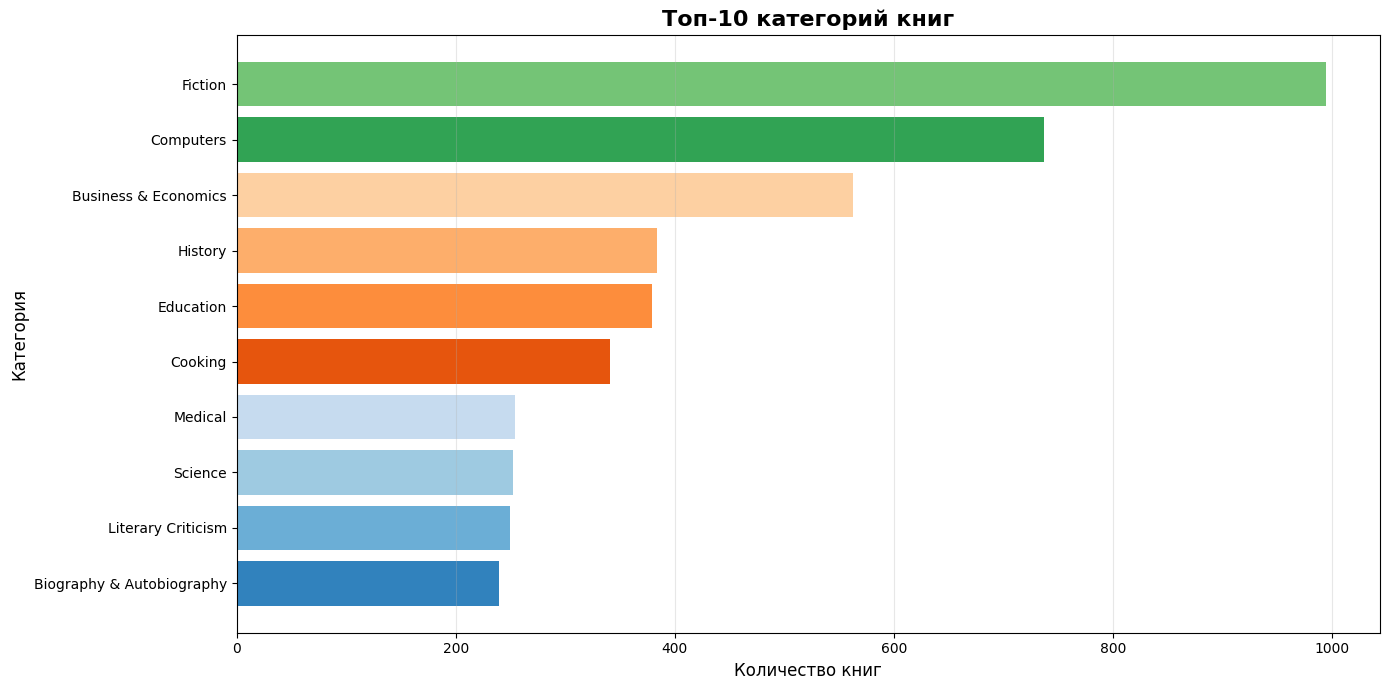

In [ ]:
categories_list = []
for cat in df['categories'].dropna():
    if '&' in cat or ',' in cat:
        categories_list.extend([c.strip() for c in cat.split(',')])
    else:
        categories_list.append(cat.strip())

categories_series = pd.Series(categories_list)
top_categories = categories_series.value_counts().head(10)

plt.figure(figsize=(14, 7))
bars = plt.barh(top_categories.index[::-1], top_categories.values[::-1],
                color=plt.cm.tab20c(np.arange(10)))

plt.title('Топ-10 категорий книг', fontsize=16, fontweight='bold')
plt.xlabel('Количество книг', fontsize=12)
plt.ylabel('Категория', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# BOXPLOT

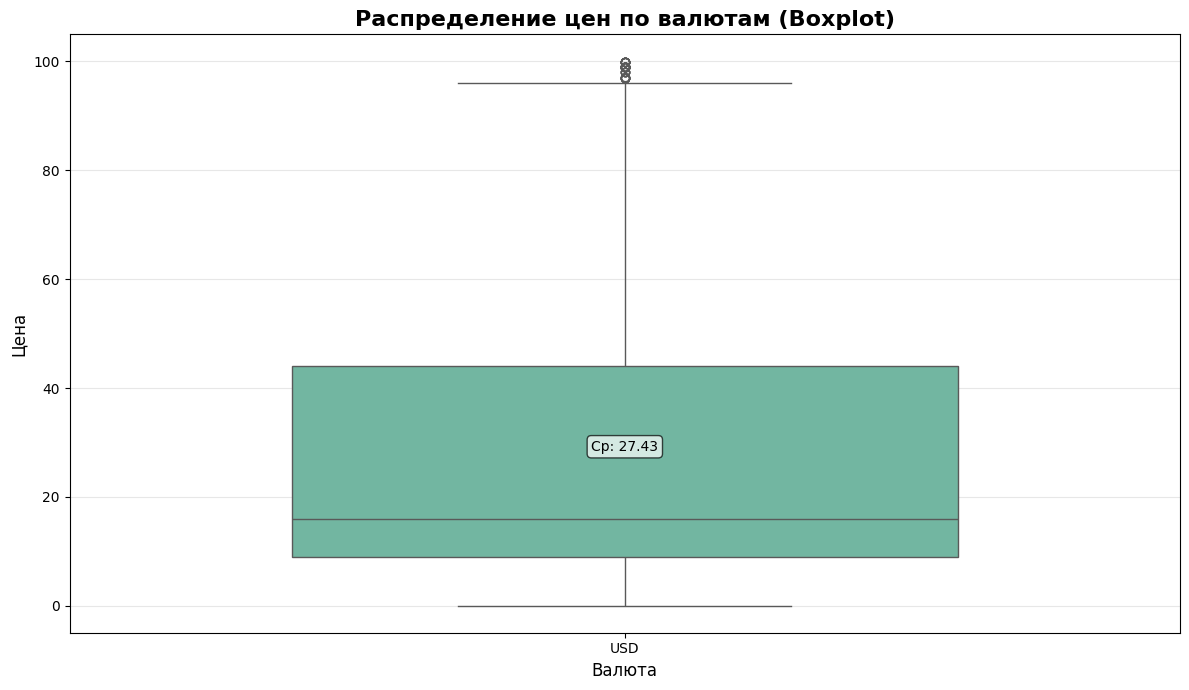

In [ ]:
price_data = df[['list_price', 'currency']].dropna()
major_currencies = price_data['currency'].value_counts().head(4).index
price_filtered = price_data[price_data['currency'].isin(major_currencies)]
price_filtered = price_filtered[(price_filtered['list_price'] > 0) &
                                (price_filtered['list_price'] < 100)]

plt.figure(figsize=(12, 7))
box = sns.boxplot(x='currency', y='list_price', data=price_filtered,
                  hue='currency', legend=False,
                  palette='Set2', width=0.6)

plt.title('Распределение цен по валютам (Boxplot)', fontsize=16, fontweight='bold')
plt.xlabel('Валюта', fontsize=12)
plt.ylabel('Цена', fontsize=12)

means = price_filtered.groupby('currency')['list_price'].mean()
for i, currency in enumerate(major_currencies):
    mean_price = means.get(currency, 0)
    plt.text(i, mean_price + 0.5, f'Ср: {mean_price:.2f}',
             ha='center', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# HEATMAP корреляции

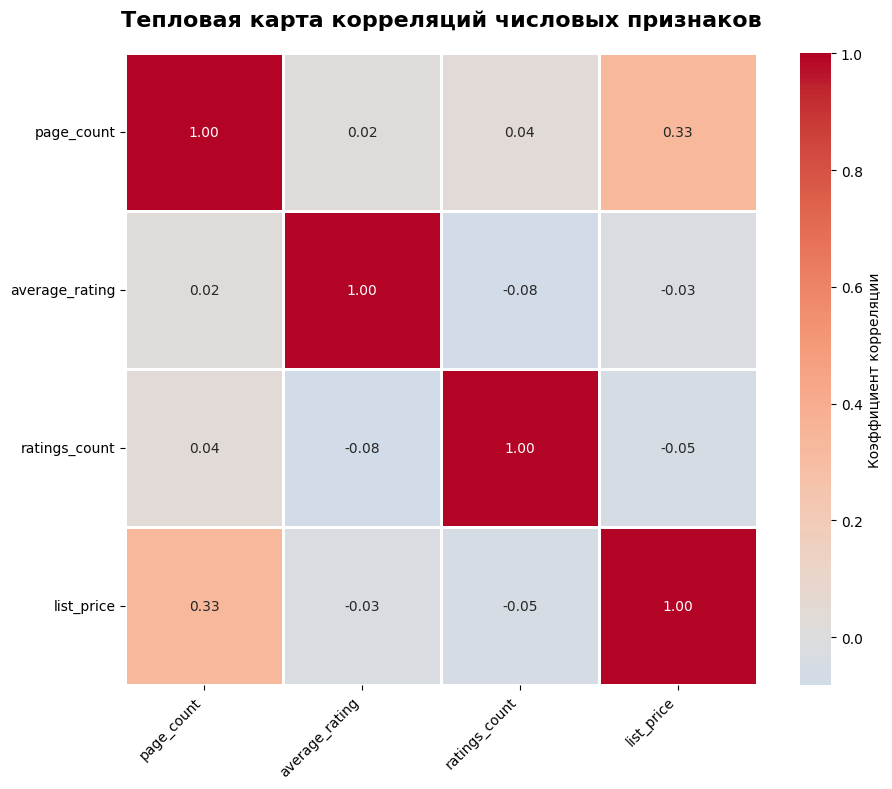

In [ ]:
numeric_cols = ['page_count', 'average_rating', 'ratings_count', 'list_price']
numeric_df = df[numeric_cols].dropna()

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                      center=0, square=True, linewidths=1,
                      cbar_kws={'label': 'Коэффициент корреляции'})

plt.title('Тепловая карта корреляций числовых признаков',
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
df['publish_year'] = df['published_date'].dt.year

# Группировка

In [ ]:
df['primary_category'] = df['categories'].astype(str).str.split(',').str[0].str.strip()

top_categories = df['primary_category'].value_counts().head(10).index
df_filtered = df[df['primary_category'].isin(top_categories)]

category_stats = df_filtered.groupby('primary_category').agg({
    'book_id': 'count',  # количество книг
    'page_count': ['mean', 'median', 'std'],  # статистика по страницам
    'list_price': ['mean', 'median', 'sum'],  # статистика по ценам
    'average_rating': 'mean'  # средний рейтинг
})

category_stats.columns = [
    'Количество книг',
    'Среднее количество страниц',
    'Медианное количество страниц',
    'Стандартное отклонение страниц',
    'Средняя цена',
    'Медианная цена',
    'Сумма всех цен',
    'Средний рейтинг'
]

print("Статистика по топ-10 категориям:")
print(category_stats.round(2))

Статистика по топ-10 категориям:
                      Количество книг  Среднее количество страниц  \
primary_category                                                    
Business & Economics              563                      353.22   
Computers                         737                      436.75   
Cooking                           341                      286.54   
Education                         379                      487.42   
Fiction                           994                      353.60   
History                           384                      409.52   
Literary Criticism                250                      335.34   
Medical                           254                      658.40   
Science                           252                      465.30   
nan                              2452                      464.42   

                      Медианное количество страниц  \
primary_category                                     
Business & Economics          

In [ ]:
valid_years = df[(df['publish_year'] >= 1900) & (df['publish_year'] <= 2025)]

yearly_stats = valid_years.groupby('publish_year').agg({
    'book_id': 'count',  # количество книг
    'page_count': 'mean',  # среднее количество страниц
    'list_price': ['mean', 'sum'],  # статистика по ценам
    'average_rating': 'mean'  # средний рейтинг
}).round(2)

yearly_stats.columns = [
    'Количество книг',
    'Среднее количество страниц',
    'Средняя цена',
    'Сумма всех цен',
    'Средний рейтинг'
]

print("Статистика публикаций по годам (первые 10 лет):")
print(yearly_stats.head(10))

print("\nСтатистика публикаций по годам (последние 10 лет):")
print(yearly_stats.tail(10))

print("\nАНАЛИЗ ТРЕНДОВ:")
print(f"Год с максимальным количеством публикаций: {yearly_stats['Количество книг'].idxmax()}")
print(f"Максимальное количество публикаций в году: {yearly_stats['Количество книг'].max()}")
print(f"Среднее количество публикаций в год: {yearly_stats['Количество книг'].mean():.0f}")

Статистика публикаций по годам (первые 10 лет):
              Количество книг  Среднее количество страниц  Средняя цена  \
publish_year                                                              
1928.0                      1                      375.00          0.99   
1963.0                      1                      714.00           NaN   
1966.0                      1                      102.00           NaN   
1967.0                      1                       80.00           NaN   
1968.0                      1                       76.00           NaN   
1970.0                      1                      451.00         64.00   
1971.0                      2                      131.50           NaN   
1972.0                      1                       32.00           NaN   
1974.0                      4                      345.25           NaN   
1975.0                      1                       38.00           NaN   

              Сумма всех цен  Средний рейтинг  
pub

In [ ]:
language_stats = df.groupby('language').agg({
    'book_id': 'count',  # количество книг
    'page_count': ['min', 'max', 'mean'],  # статистика по страницам
    'list_price': ['mean', 'median'],  # статистика по ценам
    'average_rating': ['mean', 'count']  # статистика по рейтингам
}).round(2)

# Переименуем колонки
language_stats.columns = [
    'Количество книг',
    'Минимальное количество страниц',
    'Максимальное количество страниц',
    'Среднее количество страниц',
    'Средняя цена',
    'Медианная цена',
    'Средний рейтинг',
    'Количество книг с рейтингом'
]

print("Статистика по языкам:")
print(language_stats)

# Анализ доминирующего языка
print("\nАНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО ЯЗЫКАМ:")
total_books = language_stats['Количество книг'].sum()
for lang in language_stats.index:
    count = language_stats.loc[lang, 'Количество книг']
    percentage = (count / total_books) * 100
    print(f"{lang}: {count} книг ({percentage:.1f}%)")

Статистика по языкам:
          Количество книг  Минимальное количество страниц  \
language                                                    
ar                      1                             0.0   
bs                      1                           522.0   
ca                      5                            41.0   
cs                      6                             0.0   
da                      8                           229.0   
de                     42                             0.0   
el                      1                           515.0   
en                  14821                             0.0   
es                     69                             0.0   
et                      1                           453.0   
fa                      1                             0.0   
fi                      5                           149.0   
fr                     35                             0.0   
fy                      1                           490.0   
ga

In [ ]:
currency_stats = priced_books.groupby('currency').agg({
    'book_id': 'count',  # количество книг
    'list_price': ['mean', 'median', 'min', 'max', 'sum'],  # полная статистика по ценам
    'page_count': 'mean'  # среднее количество страниц
}).round(2)

currency_stats.columns = [
    'Количество книг',
    'Средняя цена',
    'Медианная цена',
    'Минимальная цена',
    'Максимальная цена',
    'Общая сумма цен',
    'Среднее количество страниц'
]

print("Статистика по валютам:")
print(currency_stats)

Статистика по валютам:
          Количество книг  Средняя цена  Медианная цена  Минимальная цена  \
currency                                                                    
USD                  2943         48.17            19.0               0.0   

          Максимальная цена  Общая сумма цен  Среднее количество страниц  
currency                                                                  
USD                  1755.0         141757.1                      366.29  


In [ ]:
recent_books = df[(df['publish_year'] >= 2000) & (df['publish_year'] <= 2020)]

priced_books = df[df['list_price'].notna()]
pivot_count = pd.pivot_table(
    recent_books,
    values='book_id',
    index='primary_category',
    columns='publish_year',
    aggfunc='count',
    fill_value=0
)

print("Сводная таблица: Количество книг по категориям и годам")
print("(только топ-5 категорий по строкам)")
print(pivot_count.head())

pivot_price = pd.pivot_table(
    priced_books[priced_books['primary_category'].isin(top_categories[:5])],
    values='list_price',
    index='primary_category',
    columns='currency',
    aggfunc='mean',
    fill_value=0
)

print("\n\nСводная таблица: Средняя цена по категориям и валютам")
print(pivot_price.round(2))

pivot_rating = pd.pivot_table(
    recent_books[recent_books['average_rating'].notna()],
    values='average_rating',
    index='primary_category',
    columns='publish_year',
    aggfunc='mean',
    fill_value=0
)

print("\n\nСводная таблица: Средний рейтинг по категориям и годам")
print("(первые 5 строк)")
print(pivot_rating.head().round(2))

Сводная таблица: Количество книг по категориям и годам
(только топ-5 категорий по строкам)
publish_year               2000.0  2001.0  2002.0  2003.0  2004.0  2005.0  \
primary_category                                                            
Active server pages             0       0       0       0       0       0   
Adventure stories               0       0       0       0       0       0   
American prose literature       0       0       0       0       0       0   
Antiques & Collectibles         0       0       0       0       1       0   
Architecture                    0       0       0       0       1       1   

publish_year               2006.0  2007.0  2008.0  2009.0  ...  2011.0  \
primary_category                                           ...           
Active server pages             0       0       0       0  ...       0   
Adventure stories               0       0       0       0  ...       0   
American prose literature       0       0       0       0  ...       0   